In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
Data=pd.read_csv("SuperStoreUS.csv")

In [19]:
pd.set_option('display.max_columns',28)

In [20]:
Data.head()

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,Product Sub-Category,Product Container,Product Name,Product Base Margin,Country,Region,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID
0,20847,High,0.01,2.84,0.93,3,Bonnie Potter,Express Air,Corporate,Office Supplies,Pens & Art Supplies,Wrap Bag,SANFORD Liquid Accent™ Tank-Style Highlighters,0.54,United States,West,Washington,Anacortes,98221,07/01/2015,08/01/2015,4.5600,4,13.01,88522
1,20228,Not Specified,0.02,500.98,26.00,5,Ronnie Proctor,Delivery Truck,Home Office,Furniture,Chairs & Chairmats,Jumbo Drum,Global Troy™ Executive Leather Low-Back Tilter,0.60,United States,West,California,San Gabriel,91776,13/06/2015,15/06/2015,4390.3665,12,6362.85,90193
2,21776,Critical,0.06,9.48,7.29,11,Marcus Dunlap,Regular Air,Home Office,Furniture,Office Furnishings,Small Pack,"DAX Two-Tone Rosewood/Black Document Frame, De...",0.45,United States,East,New Jersey,Roselle,7203,15/02/2015,17/02/2015,-53.8096,22,211.15,90192
3,24844,Medium,0.09,78.69,19.99,14,Gwendolyn F Tyson,Regular Air,Small Business,Furniture,Office Furnishings,Small Box,Howard Miller 12-3/4 Diameter Accuwave DS ™ Wa...,0.43,United States,Central,Minnesota,Prior Lake,55372,12/05/2015,14/05/2015,803.4705,16,1164.45,86838
4,24846,Medium,0.08,3.28,2.31,14,Gwendolyn F Tyson,Regular Air,Small Business,Office Supplies,Pens & Art Supplies,Wrap Bag,Newell 321,0.56,United States,Central,Minnesota,Prior Lake,55372,12/05/2015,13/05/2015,-24.0300,7,22.23,86838


In [7]:
Data.shape

(1952, 25)

In [5]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1952 entries, 0 to 1951
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Row ID                1952 non-null   int64  
 1   Order Priority        1952 non-null   object 
 2   Discount              1952 non-null   float64
 3   Unit Price            1952 non-null   float64
 4   Shipping Cost         1952 non-null   float64
 5   Customer ID           1952 non-null   int64  
 6   Customer Name         1952 non-null   object 
 7   Ship Mode             1952 non-null   object 
 8   Customer Segment      1952 non-null   object 
 9   Product Category      1952 non-null   object 
 10  Product Sub-Category  1952 non-null   object 
 11  Product Container     1952 non-null   object 
 12  Product Name          1952 non-null   object 
 13  Product Base Margin   1936 non-null   float64
 14  Country               1952 non-null   object 
 15  Region               

In [10]:
Data.isnull().sum()

Row ID                   0
Order Priority           0
Discount                 0
Unit Price               0
Shipping Cost            0
Customer ID              0
Customer Name            0
Ship Mode                0
Customer Segment         0
Product Category         0
Product Sub-Category     0
Product Container        0
Product Name             0
Product Base Margin     16
Country                  0
Region                   0
State or Province        0
City                     0
Postal Code              0
Order Date               0
Ship Date                0
Profit                   0
Quantity ordered new     0
Sales                    0
Order ID                 0
dtype: int64

In dataset column Product Base Margin in 16 null values are present  

Let's fill the null values using maean of column Product Base Margin

In [11]:
Data["Product Base Margin"].fillna(Data["Product Base Margin"].mean(),inplace=True)

In [12]:
Data.isnull().sum()

Row ID                  0
Order Priority          0
Discount                0
Unit Price              0
Shipping Cost           0
Customer ID             0
Customer Name           0
Ship Mode               0
Customer Segment        0
Product Category        0
Product Sub-Category    0
Product Container       0
Product Name            0
Product Base Margin     0
Country                 0
Region                  0
State or Province       0
City                    0
Postal Code             0
Order Date              0
Ship Date               0
Profit                  0
Quantity ordered new    0
Sales                   0
Order ID                0
dtype: int64

# Order Priority

Analycs the data based on Order Priority Column

In [16]:
Data["Order Priority"].value_counts()

Low              398
Not Specified    396
High             391
Critical         390
Medium           376
Critical           1
Name: Order Priority, dtype: int64

 Here we seen "Critical" is count 2 time Now i sortout this problem

In [17]:
Data["Order Priority"].unique()

array(['High', 'Not Specified', 'Critical', 'Medium', 'Low', 'Critical '],
      dtype=object)

Here the problem is one of the Critical is not contain space and one of the Critical is contain sapace

In [24]:
Data["Order Priority"]=Data["Order Priority"].replace("Critical ","Critical")

In [25]:
Data["Order Priority"].value_counts()

Low              398
Not Specified    396
High             391
Critical         391
Medium           376
Name: Order Priority, dtype: int64

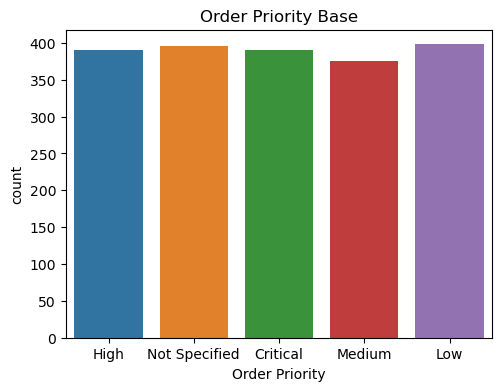

In [33]:
plt.figure(figsize=(5.5,4))
plt.title("Order Priority Base")
sns.countplot(x="Order Priority",data=Data)
plt.savefig("Order Priority.jpg")
plt.show()

# analies on shiping mode

In [6]:
Data["Ship Mode"].value_counts()

Regular Air       1437
Delivery Truck     275
Express Air        240
Name: Ship Mode, dtype: int64

In [16]:
x=Data["Ship Mode"].value_counts().index
y=Data["Ship Mode"].value_counts().values

array([1437,  275,  240], dtype=int64)

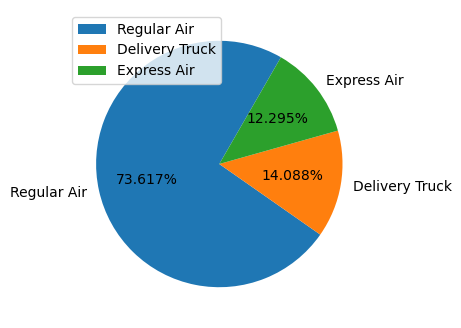

In [31]:
plt.figure(figsize=(4,4))
plt.pie(y,labels=x,startangle=60,autopct="%0.3f%%")
plt.legend(loc=2)
plt.savefig("Ship Mode.jpg")
plt.show()

Here hight ship mode is Regular Air which is 73.617% Make largest percentage of total shiping

# Shiping Mode and Product Category

Analysis with use ship Mode and Product category

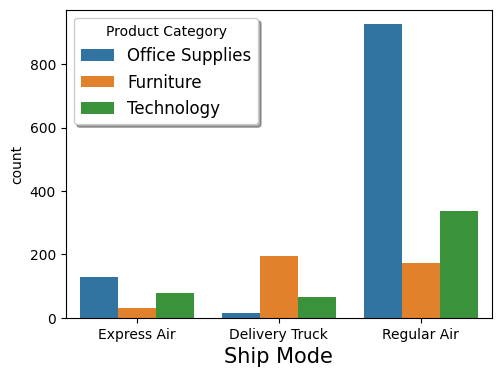

In [4]:
plt.figure(figsize=(5.5,4))
sns.countplot(x="Ship Mode",data=Data,hue="Product Category")
plt.xlabel("Ship Mode",fontsize=15)
plt.legend(title='Product Category',shadow=True,fontsize=12)
plt.savefig("Ship Mode and Product Category.jpg")
plt.show()

# Customer Segment

In [95]:
Data["Customer Segment"].value_counts()

Corporate         684
Home Office       470
Consumer          410
Small Business    388
Name: Customer Segment, dtype: int64

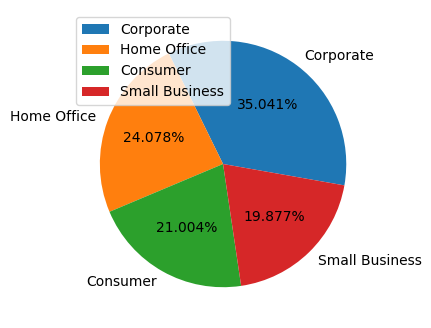

In [5]:
plt.figure(figsize=(6,4))
x=Data["Customer Segment"].value_counts().index
y=Data["Customer Segment"].value_counts().values
plt.pie(y,labels=x,startangle=-10,autopct="%0.3f%%")
plt.legend(loc=2)
plt.savefig("Customer Segment.jpg")
plt.show()

Here inside of Customer segment is height "Corporate" Sector which is 35.041 percentage and Lowest "Small Budiness" Sector which is 19.877 percentage

# Product Catogary

In [94]:
Data["Product Category"].value_counts()

Office Supplies    1071
Technology          481
Furniture           400
Name: Product Category, dtype: int64

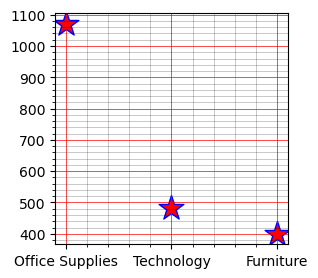

In [117]:
plt.figure(figsize=(3,3))

plt.minorticks_on()
plt.grid(which='minor' , color='black',linewidth=0.5,alpha=0.3)
plt.grid(which='major' , color='red',linewidth=0.5)

x=Data["Product Category"].value_counts().index
y=Data["Product Category"].value_counts().values
plt.scatter(x,y,marker="*",s=350,color="r",edgecolors="blue")
plt.show()

Here we can say that is largest sales of Product Category wise is 'Office Supplies'.The quantity of sales are 1071 and smallest amount is 'Furniture' which is 400

# Product Sub-Category

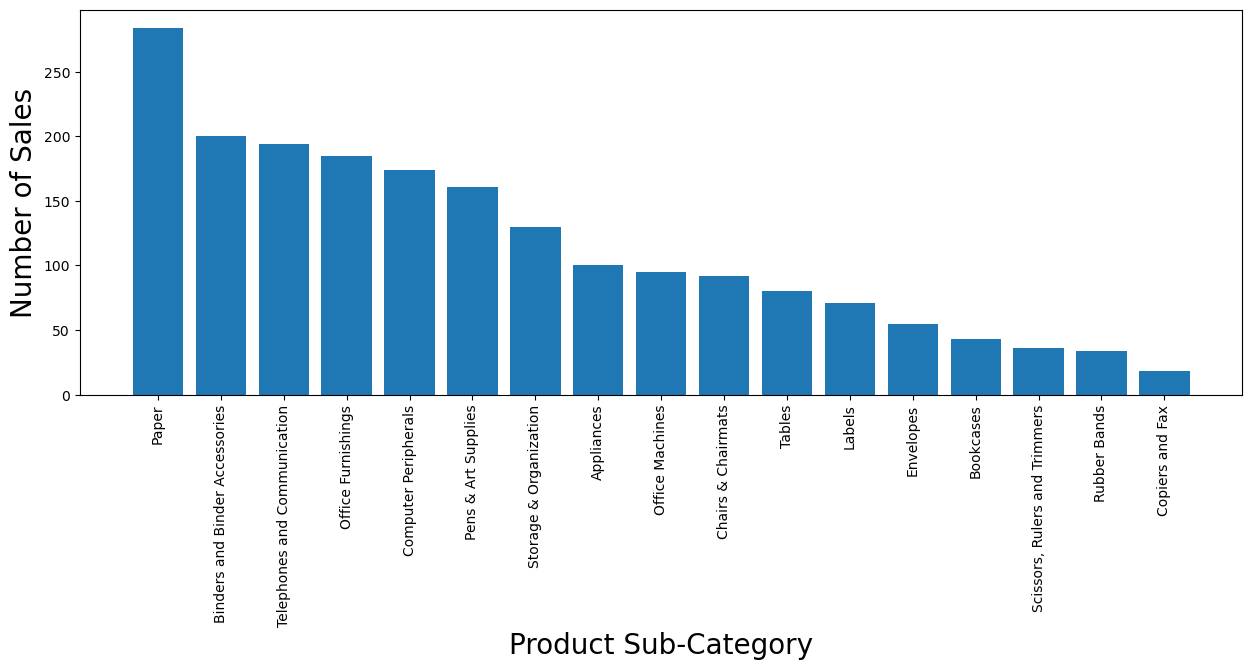

In [147]:
plt.figure(figsize=(15,5))
x=Data["Product Sub-Category"].value_counts().index
y=Data["Product Sub-Category"].value_counts().values
plt.xticks(rotation=90)

plt.xlabel("Product Sub-Category",fontsize=20)
plt.ylabel("Number of Sales",fontsize=20)

plt.bar(x,y,linewidth=0.5)
plt.show()

# Product Category wise of Product Sub - Category sale

# Office Supplies

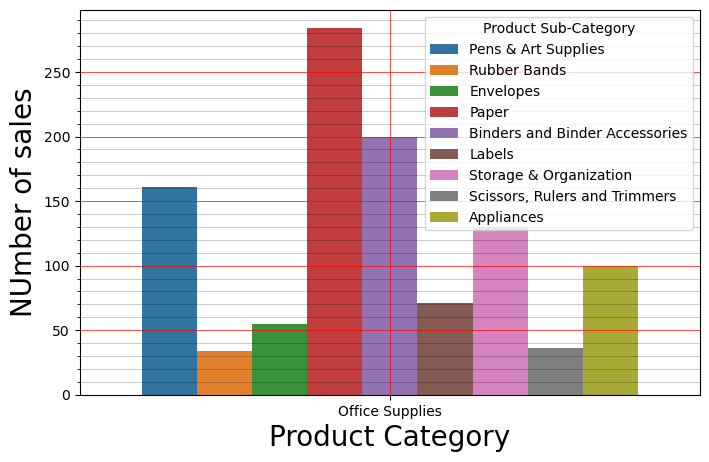

In [158]:
plt.figure(figsize=(8,5))
sns.countplot(x="Product Category",data=Data[Data["Product Category"]=="Office Supplies"],hue="Product Sub-Category")

plt.minorticks_on()
plt.grid(which='minor' , color='black',linewidth=0.5,alpha=0.3)
plt.grid(which='major' , color='red',linewidth=0.5)

plt.xlabel("Product Category",fontsize=20)
plt.ylabel("NUmber of sales",fontsize=20)
plt.show()                                      

Highest sales Paper of "Product Sub-Category" in product Category of "Office Supplies" and lowest sales 

# Technology

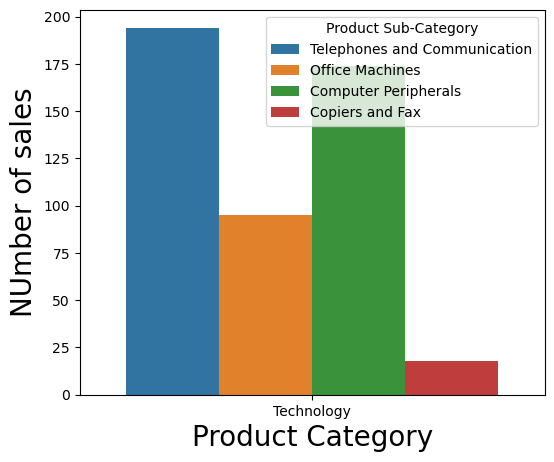

In [161]:
plt.figure(figsize=(6,5))
sns.countplot(x="Product Category",data=Data[Data["Product Category"]=="Technology"],hue="Product Sub-Category")
plt.xlabel("Product Category",fontsize=20)
plt.ylabel("NUmber of sales",fontsize=20)
plt.show()

# Furniture

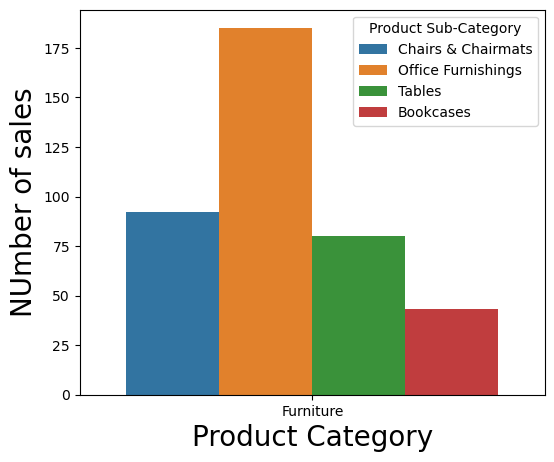

In [160]:
plt.figure(figsize=(6,5))
sns.countplot(x="Product Category",data=Data[Data["Product Category"]=="Furniture"],hue="Product Sub-Category")
plt.xlabel("Product Category",fontsize=20)
plt.ylabel("NUmber of sales",fontsize=20)
plt.show()

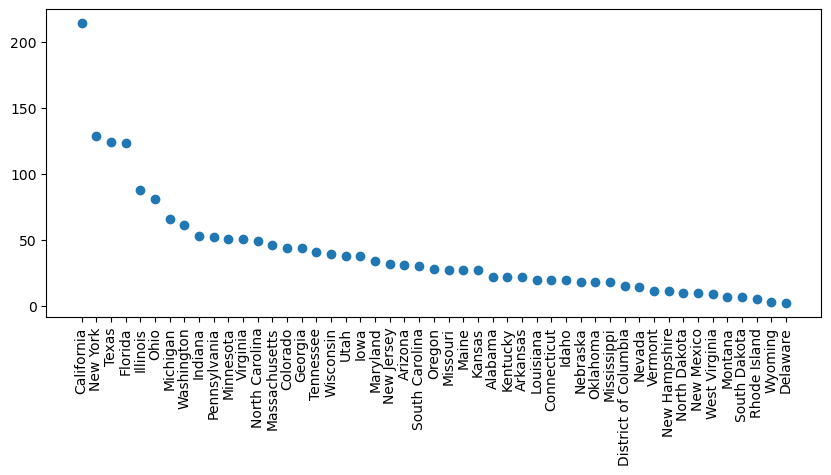

In [194]:
plt.figure(figsize=(10,4))
x=Data["State or Province"].value_counts().index
y=Data["State or Province"].value_counts().values
plt.scatter(x,y)
plt.xticks(rotation=90)
plt.show()

Highest saleing state is 'California' and lowest saleing satate is 'delaware'

In [221]:
Data['Order Date'] = pd.to_datetime(Data['Order Date']).dt.year

In [222]:
Data["year"].value_counts()

1970    1952
Name: year, dtype: int64

# Profit Product Category wise

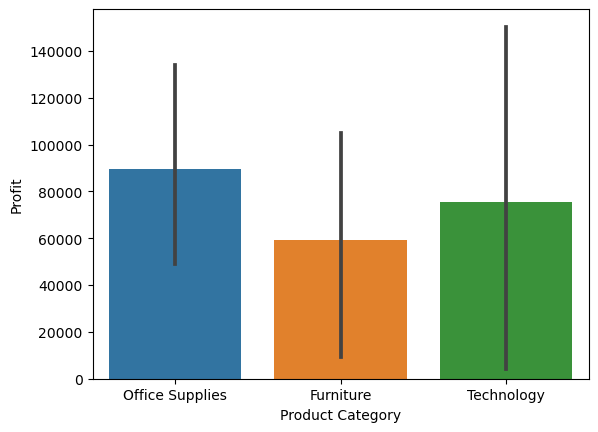

In [227]:
sns.barplot(x="Product Category",y="Profit",data=Data,estimator=sum)
plt.show()

Highest profitable Product is "Office Supplies" and lowest profitable product is "Furniture"

In [232]:
Data["Region"].value_counts()


Central    566
East       474
West       470
South      442
Name: Region, dtype: int64

# Region

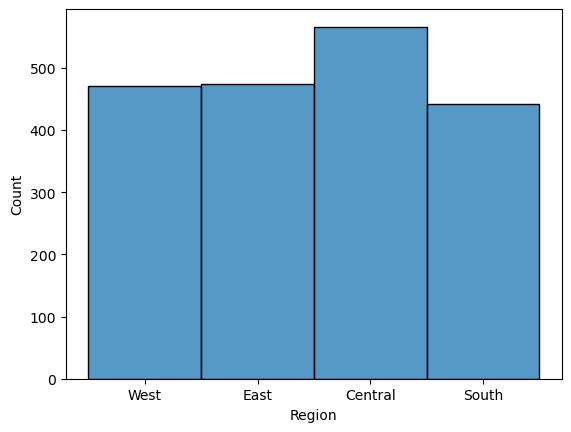

In [15]:
sns.histplot(Data["Region"],binwidth=0.5)
plt.show()

Heighest Salesable Region is Central and lowest salesable Region is South

# Region wise Profit

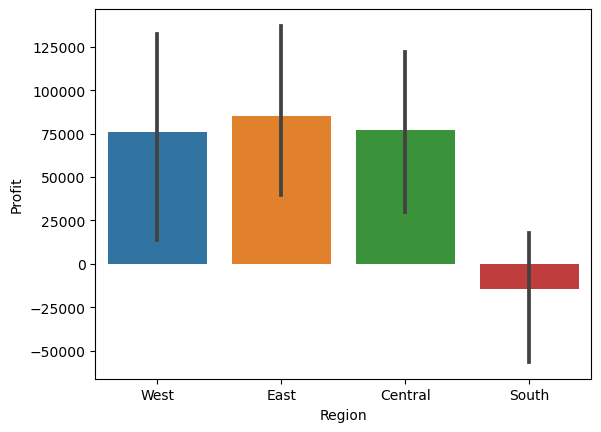

In [16]:
sns.barplot(x="Region",y="Profit",data=Data,estimator=sum)
plt.show()

Highest Profitable region is West and lowest Profitable region is South which is going to lose

# Product Category wise Profit

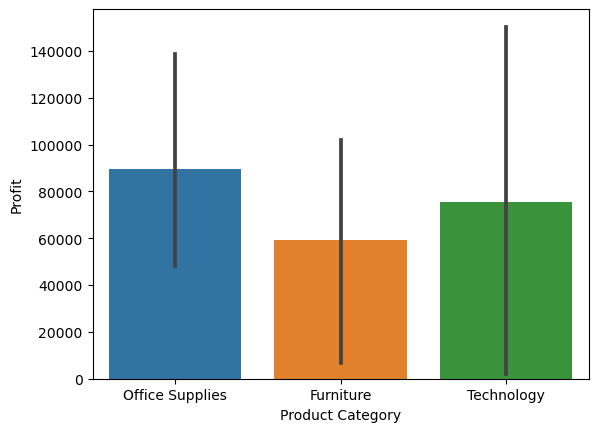

In [17]:
sns.barplot(x="Product Category",y="Profit",data=Data,estimator=sum)
plt.show()

Highest largest Profitable Product Category is Office Supplies and smallest Profitable Product Category is Furniture 

# Product Container

In [21]:
Data["Product Container"].value_counts()

Small Box     991
Wrap Bag      279
Small Pack    219
Jumbo Drum    152
Jumbo Box     124
Large Box     100
Medium Box     87
Name: Product Container, dtype: int64

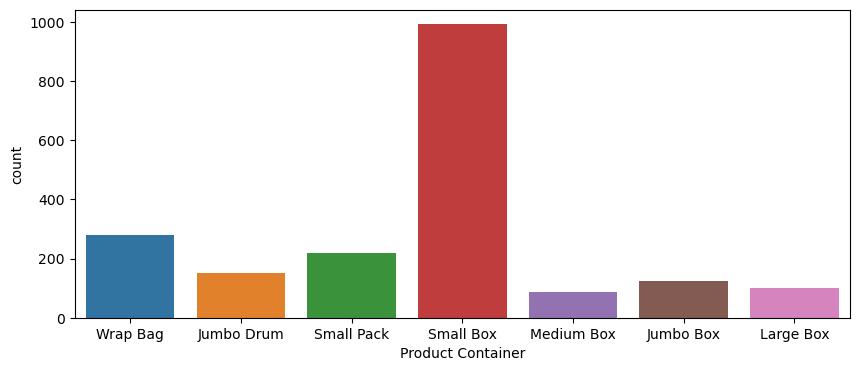

In [28]:
plt.figure(figsize=(10,4))
sns.countplot(x="Product Container",data = Data)
plt.show()

highest salesable Product Container is 'small Box' and lowest salesable is 'Medium Box' 

# Profit Product Container wise 

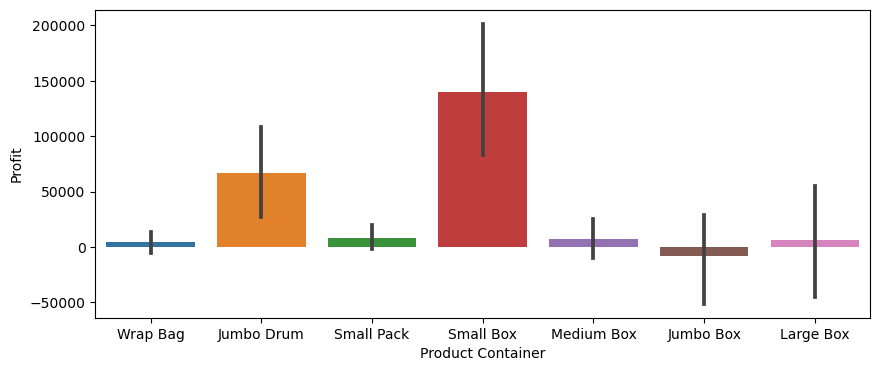

In [31]:
plt.figure(figsize=(10,4))
sns.barplot(x="Product Container",y="Profit",data=Data,estimator=sum)
plt.show()